In [80]:
# Learning Objectives

# Descriptive Statistics
# Basic of Grouping using groupBy 
# ANOVA
# Correlation

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
from matplotlib import pyplot
%matplotlib inline

# Dont forget %matplotlib inline



In [81]:
path = "C:\\Users\\melan\\anaconda3\\PyCharmProject\\EdxCourse\\automobileEDA_module3.csv"
df = pd.read_csv(path)

df.head()


,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


In [82]:
df.columns

# Exploratory data analysis or in short EDA is an approach to analyze data in order to
# summarize main characteristics of the data gain better understanding of the data set,
# uncover relationships between different variables, and extract important variables for the problem
# we're trying to solve. The main question we are trying to answer in this module is
# what are the characteristics that have the most impact on the car price?


Index(['symboling', 'normalized-losses', 'make', 'aspiration', 'num-of-doors',
       'body-style', 'drive-wheels', 'engine-location', 'wheel-base', 'length',
       'width', 'height', 'curb-weight', 'engine-type', 'num-of-cylinders',
       'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-ratio',
       'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price',
       'city-L/100km', 'horsepower-binned', 'diesel', 'gas'],
      dtype='object')

In [83]:
df.isnull().sum()

symboling            0
normalized-losses    0
make                 0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               4
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
city-L/100km         0
horsepower-binned    1
diesel               0
gas                  0
dtype: int64

In [84]:
# Analyzing Individual Feature Patterns Using Visualization
# When visualizing individual variables, it is important to first understand what type of variable you are dealing with. 
# This will help us find the right visualization method for that variable.

df.dtypes

symboling              int64
normalized-losses      int64
make                  object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
city-L/100km         float64
horsepower-binned     object
diesel                 int64
gas                    int64
dtype: object

In [85]:
# get the types of peqk-rpm: 

print(df['peak-rpm'].dtypes)

float64


In [86]:
# VISUALIZE AND CALCULATE THE CORRELATION BETWEEN VARIABLES
# use the function df.corr()

df.corr()

# The diagonal elements are always one;
# we will study correlation more precisely Pearson correlation in-depth at the end of the notebook.

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
symboling,1.000000,0.466264,-0.535987,-0.365404,-0.242423,-0.550160,-0.233118,-0.110581,-0.140019,-0.008245,-0.182196,0.075819,0.279740,-0.035527,0.036233,-0.082391,0.066171,-0.196735,0.196735
normalized-losses,0.466264,1.000000,-0.056661,0.019424,0.086802,-0.373737,0.099404,0.112360,-0.029862,0.055563,-0.114713,0.217299,0.239543,-0.225016,-0.181877,0.133999,0.238567,-0.101546,0.101546
wheel-base,-0.535987,-0.056661,1.000000,0.876024,0.814507,0.590742,0.782097,0.572027,0.493244,0.158502,0.250313,0.371147,-0.360305,-0.470606,-0.543304,0.584642,0.476153,0.307237,-0.307237
length,-0.365404,0.019424,0.876024,1.000000,0.857170,0.492063,0.880665,0.685025,0.608971,0.124139,0.159733,0.579821,-0.285970,-0.665192,-0.698142,0.690628,0.657373,0.211187,-0.211187
width,-0.242423,0.086802,0.814507,0.857170,1.000000,0.306002,0.866201,0.729436,0.544885,0.188829,0.189867,0.615077,-0.245800,-0.633531,-0.680635,0.751265,0.673363,0.244356,-0.244356
height,-0.550160,-0.373737,0.590742,0.492063,0.306002,1.000000,0.307581,0.074694,0.180449,-0.062704,0.259737,-0.087027,-0.309974,-0.049800,-0.104812,0.135486,0.003811,0.281578,-0.281578
curb-weight,-0.233118,0.099404,0.782097,0.880665,0.866201,0.307581,1.000000,0.849072,0.644060,0.167562,0.156433,0.757976,-0.279361,-0.749543,-0.794889,0.834415,0.785353,0.221046,-0.221046
engine-size,-0.110581,0.112360,0.572027,0.685025,0.729436,0.074694,0.849072,1.000000,0.572609,0.209523,0.028889,0.822676,-0.256733,-0.650546,-0.679571,0.872335,0.745059,0.070779,-0.070779
bore,-0.140019,-0.029862,0.493244,0.608971,0.544885,0.180449,0.644060,0.572609,1.000000,-0.055390,0.001263,0.566936,-0.267392,-0.582027,-0.591309,0.543155,0.554610,0.054458,-0.054458
stroke,-0.008245,0.055563,0.158502,0.124139,0.188829,-0.062704,0.167562,0.209523,-0.055390,1.000000,0.187923,0.098462,-0.065713,-0.034696,-0.035201,0.082310,0.037300,0.241303,-0.241303


In [87]:
# Find the correlation between bore, stroke, compression-ratio, and horsepower

df[['bore', 'stroke', 'compression-ratio', 'horsepower']].corr()

,bore,stroke,compression-ratio,horsepower
bore,1.000000,-0.055390,0.001263,0.566936
stroke,-0.055390,1.000000,0.187923,0.098462
compression-ratio,0.001263,0.187923,1.000000,-0.214514
horsepower,0.566936,0.098462,-0.214514,1.000000


In [88]:
# Continuous Numerical Variables:

# Continuous numerical variables are variables that may contain any value within some range. 
# They can be of type "int64" or "float64". 
# A great way to visualize these variables is by using scatterplots with fitted lines.

AttributeError: module 'matplotlib' has no attribute 'ylim'

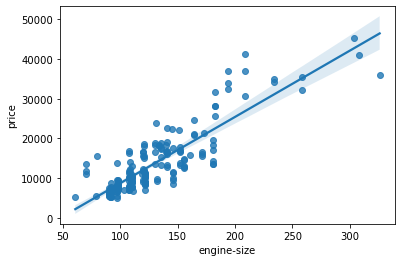

In [89]:
# we can use "regplot" which plots the scatterplot plus the fitted regression line for the data.

# POSITIVE LINEAR RELATIONSHIP
# Engine size as potential predictor variable of price


sns.regplot(x="engine-size", y="price", data=df)
plt.ylim(0,)

# As the engine-size goes up, the price goes up: this indicates a positive direct correlation between these two variables. 
# Engine size seems like a pretty good predictor of price since the regression line is almost a perfect diagonal line.


In [90]:
df[["engine-size", "price"]].corr()

#  correlation between 'engine-size' and 'price' and see that it's approximately 0.87


,engine-size,price
engine-size,1.000000,0.872335
price,0.872335,1.000000


<AxesSubplot:xlabel='highway-mpg', ylabel='price'>

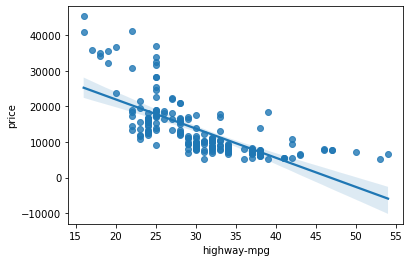

In [93]:
# NEGATIVE CORRELATION 
# Highway mpg is a potential predictor variable of price. Let's find the scatterplot of "highway-mpg" and "price".

sns.regplot(x="highway-mpg", y="price", data=df)


In [95]:
df[["highway-mpg","price"]].corr()

# We have a negative correlation, 
# when price goes up, highway-mpg does down


,highway-mpg,price
highway-mpg,1.000000,-0.704692
price,-0.704692,1.000000


<AxesSubplot:xlabel='peak-rpm', ylabel='price'>

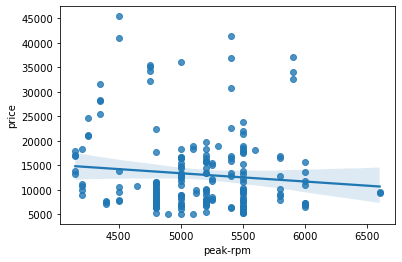

In [97]:
# WEAK LINEAR RELATIONSHIP

sns.regplot(x="peak-rpm", y="price", data=df)


In [99]:
df[["peak-rpm","price"]].corr()

# The correlation is close to 0, so no real correlation


,peak-rpm,price
peak-rpm,1.000000,-0.101616
price,-0.101616,1.000000


In [100]:
# Find the correlation between "stroke" and "price" and create the plot

df[["stroke", "price"]].corr()


,stroke,price
stroke,1.00000,0.08231
price,0.08231,1.00000


<AxesSubplot:xlabel='stroke', ylabel='price'>

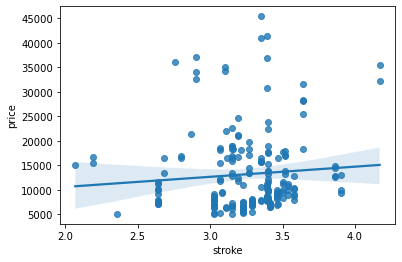

In [102]:
sns.regplot(x="stroke", y="price", data=df)

# No correlation between stroke and price


In [ ]:
# CATEGORICAL VARIABLES
# These are variables that describe a 'characteristic' of a data unit, and are selected from a small group of categories. 
# The categorical variables can have the type "object" or "int64". 
# A good way to visualize categorical variables is by using boxplots.

<AxesSubplot:xlabel='body-style', ylabel='price'>

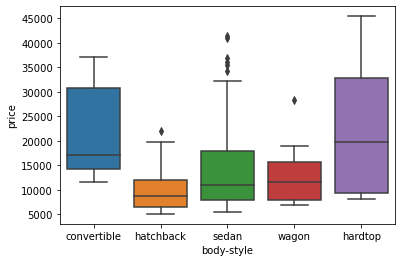

In [113]:
# With box plots, you can easily spot outliers, and also see the distribution and skewness of the data.
# Box plots make it easy to compare between groups.
# In this example, using box plot we can see the distribution of different categories
# of the body style feature over price feature. 

# Let's look at the relationship between "body-style" and "price".
sns.boxplot(x="body-style", y="price", data=df)

# We see that the distributions of price between the different body-style categories have a significant overlap, 
#so body-style would not be a good predictor of price. 

<AxesSubplot:xlabel='engine-location', ylabel='price'>

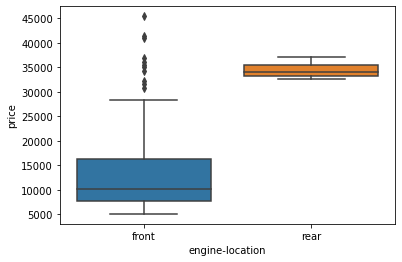

In [106]:
# Let's examine engine "engine-location" and "price"
sns.boxplot(x="engine-location", y="price", data=df)

# Here we see that the distribution of price between these two engine-location categories, front and rear, 
# are distinct enough to take engine-location as a potential good predictor of price.

<AxesSubplot:xlabel='drive-wheels', ylabel='price'>

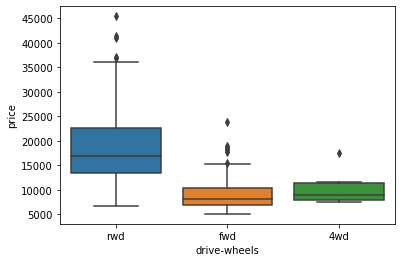

In [108]:
# # Let's examine "drive-wheels" and "price"
sns.boxplot(x="drive-wheels", y="price", data=df)

# Here we see that the distribution of price between the different drive-wheels categories differs. 
# As such, drive-wheels could potentially be a predictor of price


In [109]:
# DESCRIPTIVE STATISTICS
    # It is inportant to first explore your data before you spend time building complicated models
    # Easy way to do: calculate some Descriptive Statistics for your data
    # One way to do so is by using pandas describe() method df.describe() => for all numerical values (No NaN values)
    
df.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
count,201.000000,201.00000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,197.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,0.840796,122.00000,98.797015,0.837102,0.915126,53.766667,2555.666667,126.875622,3.330692,3.256904,10.164279,103.405534,5117.665368,25.179104,30.686567,13207.129353,9.944145,0.099502,0.900498
std,1.254802,31.99625,6.066366,0.059213,0.029187,2.447822,517.296727,41.546834,0.268072,0.319256,4.004965,37.365700,478.113805,6.423220,6.815150,7947.066342,2.534599,0.300083,0.300083
min,-2.000000,65.00000,86.600000,0.678039,0.837500,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000,4.795918,0.000000,0.000000
25%,0.000000,101.00000,94.500000,0.801538,0.890278,52.000000,2169.000000,98.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000,7.833333,0.000000,1.000000
50%,1.000000,122.00000,97.000000,0.832292,0.909722,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5125.369458,24.000000,30.000000,10295.000000,9.791667,0.000000,1.000000
75%,2.000000,137.00000,102.400000,0.881788,0.925000,55.500000,2926.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000,12.368421,0.000000,1.000000
max,3.000000,256.00000,120.900000,1.000000,1.000000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,49.000000,54.000000,45400.000000,18.076923,1.000000,1.000000


In [111]:
# The default setting of "describe" skips variables of type object. 
# We can apply the method "describe" on the variables of type 'object' as follows:

df.describe(include = ['object'])


,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system,horsepower-binned
count,201,201,201,201,201,201,201,201,201,200
unique,22,2,2,5,3,2,6,7,8,3
top,toyota,std,four,sedan,fwd,front,ohc,four,mpfi,Low
freq,32,165,115,94,118,198,145,157,92,115


In [112]:
    # You could have also categorical variables in your data set.
    # These are variables that can be divided up into different categories or groups, and have discrete values.
    # One way to summarize the categorical datat is by using the function value_counts()
    # in our data set ex, for drive system: drive_wheels_counts = df["drive-wheels"].value_counts().to_frame()

#  "value_counts" only works on pandas series, not pandas dataframes. 
# As a result, we only include one bracket df['drive-wheels'], not two brackets df[['drive-wheels']].

df["drive-wheels"].value_counts()




fwd    118
rwd     75
4wd      8
Name: drive-wheels, dtype: int64

In [114]:
# We can convert the series to a dataframe to be easier to read:

df["drive-wheels"].value_counts().to_frame()


,drive-wheels
fwd,118
rwd,75
4wd,8


In [119]:
# Let's repeat the above steps 
# but save the results to the dataframe "drive_wheels_counts" and rename the column 'drive-wheels' to 'value_counts'.

drive_wheels_counts = df["drive-wheels"].value_counts().to_frame()
drive_wheels_counts.rename(columns={"drive-wheels":"value_counts"}, inplace=True)

drive_wheels_counts

,value_counts
fwd,118
rwd,75
4wd,8


In [120]:
# Now let's rename the index to 'drive-wheels':

drive_wheels_counts.index.name = "drive-wheels"
drive_wheels_counts


,value_counts
drive-wheels,
fwd,118
rwd,75
4wd,8


In [121]:
# We can repeat the above process for the variable 'engine-location'

engine_location_counts = df["engine-location"].value_counts().to_frame()
engine_location_counts.rename(columns={"engine-location":"value_counts"}, inplace= True)
engine_location_counts.index.name = "engine-location"
engine_location_counts

# engine location would not be a good predicator as variable for the price. 
# This is because we only have three cars with a rear engine and 198 with an engine in the front, so this result is skewed.


,value_counts
engine-location,
front,198
rear,3


Text(0, 0.5, 'Price')

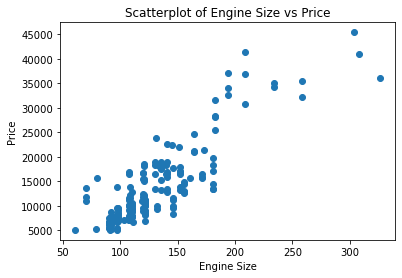

In [122]:
# In our data set, price and engine size are continuous variables
# What if we want to understand the relationship between engine size and price
# One good way to visualize this is using a SCATTER PLOT
# Each observation in the scatter plot is represented as a point
# scatter plot shows the relationship between two variables


import matplotlib.pyplot as plt

x = df["engine-size"]
y = df["price"]
plt.scatter(x,y)

plt.title("Scatterplot of Engine Size vs Price")
plt.xlabel("Engine Size")
plt.ylabel("Price")

# From the scatter plot, we see that as the engine size goes up, the price of the car goes up as well
# Gives us an initial indication that there is a positive linear relationship between these 2 variables

In [132]:
# GroupBy in Python
# Ex: Assume you want to know if there is any relationship between the different types of drive system,
# forward, rear, and four-wheel drive, and the price of the vehicles?
# If so, which type of drive system adds the most value to a vehicle?

# the idea is to group all the data by drive wheels and comparethe results of these diff drive wheels against each other
# done using df.groupby() method:
    # Can be applied on categorical variables
    # Group data into categories
    # single or multiple variables by passing in multiple variable names


In [127]:
# For example, let's group by the variable "drive-wheels". We see that there are 3 different categories of drive wheels.

df['drive-wheels'].unique()


array(['rwd', 'fwd', '4wd'], dtype=object)

In [128]:
# As an example, let's say we are interested in finding the average price of vehicles and
# observe how they differ between different types of body styles and drive wheels variables.

# call the 3 data columns we are interested in:
df_group_one = df[["drive-wheels", "body-style", "price"]]

# group the reduced data according to drive wheels and body style
# Since we are interested in knowing how the average price differs across the board, we can take the mean of each group
df_grp = df_group_one.groupby(["drive-wheels", "body-style"], as_index= False).mean()

df_grp

# below tables shows the avg price grouped by categories (drive wheels and body style)
# RWD convertible and RWD hatchback have the highest values



,drive-wheels,body-style,price
0,4wd,hatchback,7603.000000
1,4wd,sedan,12647.333333
2,4wd,wagon,9095.750000
3,fwd,convertible,11595.000000
4,fwd,hardtop,8249.000000
5,fwd,hatchback,8396.387755
6,fwd,sedan,9811.800000
7,fwd,wagon,9997.333333
8,rwd,convertible,23949.600000
9,rwd,hardtop,24202.714286


In [130]:
#the above table can be easier to ready by transforming in a Pivot table, using pivot method

# In pivot, 1 varible is displayed along the columns, and 1 varibale is displayed along the rows:
grouped_pivot = df_grp.pivot(index = "drive-wheels", columns = "body-style")

grouped_pivot

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  NaN           NaN   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

In [131]:
grouped_pivot = grouped_pivot.fillna(0) # to convert NaN in 0
grouped_pivot

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  0.0      0.000000   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

In [165]:
# Use the "groupby" function to find the average "price" of each car based on "body-style"

df_group_two = df[["body-style", "price"]]

grouped_test_body_style = df_group_two.groupby(['body-style'], as_index = False). mean()
grouped_test_body_style



,body-style,price
0,convertible,21890.500000
1,hardtop,22208.500000
2,hatchback,9957.441176
3,sedan,14459.755319
4,wagon,12371.960000


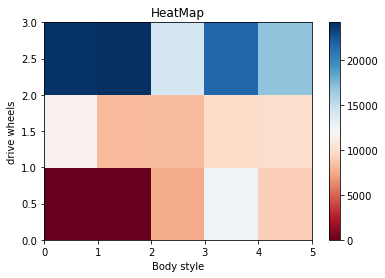

In [140]:
# HEATMAP method

# Heat map takes a rectangular grid of data and assigns a color intensity based on the data value at the grid points.
# It is a great way to plot the target variable over multiple variables and through this get visual clues with
# the relationship between these variables and the target

# use pyplot's pcolor method

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

x = df["body-style"]
y = df["drive-wheels"]

plt.title("HeatMap")
plt.xlabel("Body style")
plt.ylabel("drive wheels")

plt.pcolor(grouped_pivot, cmap='RdBu') # RdBu = Read Blue color scheme
plt.colorbar()
plt.show()


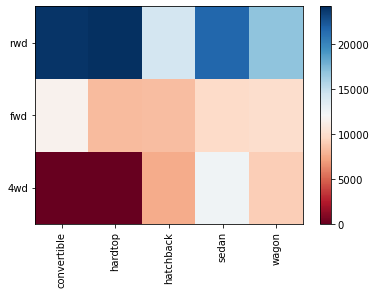

In [144]:
# The default labels convey no useful information to us. Let's change that:

fig, ax = plt.subplots()
im = ax.pcolor(grouped_pivot, cmap = 'RdBu')

# label names:
row_labels = grouped_pivot.columns.levels[1]
col_labels = grouped_pivot.index

# move ticks and labels to the center
ax.set_xticks(np.arange(grouped_pivot.shape[1]) + 0.5, minor = False)
ax.set_yticks(np.arange(grouped_pivot.shape[0]) + 0.5, minor = False)

# insert label names
ax.set_xticklabels(row_labels, minor = False)
ax.set_yticklabels(col_labels, minor = False)

# rotate labels if too long
plt.xticks(rotation = 90)

fig.colorbar(im)
plt.show()

# The main question we want to answer in this module is, 
# "What are the main characteristics which have the most impact on the car price?".
# To get a better measure of the important characteristics, 
# we look at the correlation of these variables with the car price. 
# In other words: how is the car price dependent on this variable?

In [145]:
# CORRELATION between diff variables
#It measures to what extent diff variables are interdependent
    # For ex: correlation between lung cancer and smoking
            # Correlation between rain and umbrella


# but CORRELATION DOES NOT IMPLY CAUSATION
    # We have not enough info to say if the umbrella caused the rain, or if rain caused the umbrella

In [146]:
import numpy as np
pd.isnull(df).sum()


symboling            0
normalized-losses    0
make                 0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               4
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
city-L/100km         0
horsepower-binned    1
diesel               0
gas                  0
dtype: int64

In [149]:
# CORRELATION STATISTICAL METHODS
# One way to measure the strength of the correlation between continuous numerical variable
# is by using a method called Pearson correlation.
    # it measure the strength of the correlation between 2 features
    # it gives the correlation coefficient
    # and the P-value


# For CORRELATION COEFFICIENT
    # close to +1: Large pos relationship
    # close to -1: Large neg relatioship
    # close to 0: No relationship


# P- Value is the probability value that the correlation between these two variables is statistically significant.
    # P-value < 0.001: Strong certainty in the results
    # P-value < 0.05: Moderate certainty in the results
    # P-value < 0.1: weak certainty in the results
    # P-value > 0.1: No certainty in the results
    
    
# STRONG CORRELATION:
    # Correlation Coefficient close to 1 or -1
    # P-value less than 0.001
    

In [150]:
# Like before, we can calculate the Pearson Correlation of the of the 'int64' or 'float64' variables.

df.corr()


,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
symboling,1.000000,0.466264,-0.535987,-0.365404,-0.242423,-0.550160,-0.233118,-0.110581,-0.140019,-0.008245,-0.182196,0.075819,0.279740,-0.035527,0.036233,-0.082391,0.066171,-0.196735,0.196735
normalized-losses,0.466264,1.000000,-0.056661,0.019424,0.086802,-0.373737,0.099404,0.112360,-0.029862,0.055563,-0.114713,0.217299,0.239543,-0.225016,-0.181877,0.133999,0.238567,-0.101546,0.101546
wheel-base,-0.535987,-0.056661,1.000000,0.876024,0.814507,0.590742,0.782097,0.572027,0.493244,0.158502,0.250313,0.371147,-0.360305,-0.470606,-0.543304,0.584642,0.476153,0.307237,-0.307237
length,-0.365404,0.019424,0.876024,1.000000,0.857170,0.492063,0.880665,0.685025,0.608971,0.124139,0.159733,0.579821,-0.285970,-0.665192,-0.698142,0.690628,0.657373,0.211187,-0.211187
width,-0.242423,0.086802,0.814507,0.857170,1.000000,0.306002,0.866201,0.729436,0.544885,0.188829,0.189867,0.615077,-0.245800,-0.633531,-0.680635,0.751265,0.673363,0.244356,-0.244356
height,-0.550160,-0.373737,0.590742,0.492063,0.306002,1.000000,0.307581,0.074694,0.180449,-0.062704,0.259737,-0.087027,-0.309974,-0.049800,-0.104812,0.135486,0.003811,0.281578,-0.281578
curb-weight,-0.233118,0.099404,0.782097,0.880665,0.866201,0.307581,1.000000,0.849072,0.644060,0.167562,0.156433,0.757976,-0.279361,-0.749543,-0.794889,0.834415,0.785353,0.221046,-0.221046
engine-size,-0.110581,0.112360,0.572027,0.685025,0.729436,0.074694,0.849072,1.000000,0.572609,0.209523,0.028889,0.822676,-0.256733,-0.650546,-0.679571,0.872335,0.745059,0.070779,-0.070779
bore,-0.140019,-0.029862,0.493244,0.608971,0.544885,0.180449,0.644060,0.572609,1.000000,-0.055390,0.001263,0.566936,-0.267392,-0.582027,-0.591309,0.543155,0.554610,0.054458,-0.054458
stroke,-0.008245,0.055563,0.158502,0.124139,0.188829,-0.062704,0.167562,0.209523,-0.055390,1.000000,0.187923,0.098462,-0.065713,-0.034696,-0.035201,0.082310,0.037300,0.241303,-0.241303


In [3]:
# Ex: we want to calculate the correlation between the variable's wheel-base and car price

from scipy import stats
from scipy.stats import norm

pearson_coef, p_value = stats.pearsonr(df['wheel-base'], df['price'])
stats.pearsonr(df['wheel-base'], df['price'])

# In the below results:
# Pearson correlation: 0.58 => moderate relationship 
# P-value = 8.07e-20 => very small, smaller than 0.001, so we can NOT conclude a strong correlation


NameError: name 'df' is not defined

In [ ]:
# Let's calculate the correlation between 'horsepower' and the car price

pearson_coef, p_value = stats.pearsonr(df['horsepower'], df['price'])
stats.pearsonr(df['horsepower'], df['price'])

# in this ex:
# Pearson corrlation => 0.81 extremely high
# P-value => 6.39e-48 = < 0.001, 
# Since the p-value is  <  0.001, the correlation between horsepower and price is statistically significant, 
# and the linear relationship is quite strong (~0.809, close to 1).

In [ ]:
# Correlation between length and Price

pearson_coef, p_value = stats.pearsonr(df['length'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, "with a P-value of P:", p_value)

# since the p-value is < 0.01, the correlation between length and price is statistically significant
# with a linear relationship moderately strong (0.69)


In [4]:
# Correlation between width and price

pearson_coef, p_value = stats.pearsonr(df['width'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, "with a P-value of", p_value)

# Since the P-value is < 0.001, the correlation between length and price is statistically significant 
# with a linear a strong linear relationship (0.75)

NameError: name 'df' is not defined

In [160]:
# Correlation between city-mpg and price
pearson_coef, p_value = stats.pearsonr(df['city-mpg'], df['price'])
print("the Pearson Coefficient Correlation is", pearson_coef, "and the P-value is:", p_value)

# Since the p-value is  <  0.001, the correlation between city-mpg and price is statistically significant, 
# and the coefficient of about -0.687 shows that the relationship is negative and moderately strong.

the Pearson Coefficient Correlation is -0.6865710067844681 and the P-value is: 2.3211320655673773e-29


In [161]:
# ANOVA: ANalysis Of VAriance
# is statistical method used to test whether there are significant differences between the means of two or more groups. 
# ANOVA returns two parameters:

    # F-test score:
# ANOVA assumes the means of all groups are the same, calculates how much the actual means deviate from the assumption, 
# and reports it as the F-test score. 
# A larger score means there is a larger difference between the means

    # P-Value:
#  P-value tells how statistically significant our calculated score value is.
# If our price variable is strongly correlated with the variable we are analyzing, 
# we expect ANOVA to return a sizeable F-test score and a small p-value.


In [167]:
# Since ANOVA analyzes the difference between different groups of the same variable, 
# the groupby function will come in handy. 
# Because the ANOVA algorithm averages the data automatically, we do not need to take the average before hand.

# To see if different types of 'drive-wheels' impact 'price', we group the data.

grouped_test2 = df_group_one[['drive-wheels', 'price']].groupby(['drive-wheels'])
grouped_test2.head(2)

,drive-wheels,price
0,rwd,13495.0
1,rwd,16500.0
3,fwd,13950.0
4,4wd,17450.0
5,fwd,15250.0
136,4wd,7603.0


In [171]:
df_group_one

,drive-wheels,body-style,price
0,rwd,convertible,13495.0
1,rwd,convertible,16500.0
2,rwd,hatchback,16500.0
3,fwd,sedan,13950.0
4,4wd,sedan,17450.0
...,...,...,...
196,rwd,sedan,16845.0
197,rwd,sedan,19045.0
198,rwd,sedan,21485.0
199,rwd,sedan,22470.0


In [2]:
# We can obtain the values of the method group using the method "get_group".

grouped_test2.get_group('4wd')['price']

NameError: name 'grouped_test2' is not defined

In [175]:
# We can use the function 'f_oneway' in the module 'stats' to obtain the F-test score and P-value.

# ANOVA
f_val, p_val = stats.f_oneway(grouped_test2.get_group('fwd')['price'], grouped_test2.get_group('rwd')['price'], grouped_test2.get_group('4wd')['price'])
print("ANOVA results: F=", f_val, ", P=", p_val)

# This is a great result with a large F-test score showing a strong correlation 
# and a P-value of almost 0 implying almost certain statistical significance. 
# But does this mean all three tested groups are all this highly correlated?


ANOVA results: F= 67.95406500780399 , P= 3.3945443577151245e-23


In [1]:
# fwd and rwd
f_val, p_val = stats.f_oneway(grouped_test2.get_group('fwd')['price'], grouped_test2.get_group('rwd')['price'])
print( "ANOVA results: F=", f_val, ", P =", p_val )

NameError: name 'stats' is not defined

In [180]:
# 4wd and rwd
f_val, p_val = stats.f_oneway(grouped_test2.get_group('4wd')['price'], grouped_test2.get_group('rwd')['price'])
print("ANOVA results: F=", f_val, ", P=", p_val)

ANOVA results: F= 8.580681368924756 , P= 0.004411492211225333


In [181]:
# 4wd and fwd
f_val, p_val = stats.f_oneway(grouped_test2.get_group('4wd')['price'], grouped_test2.get_group('fwd')['price'])
print("ANOVA results: F =", f_val, ", P =", p_val)

ANOVA results: F = 0.665465750252303 , P = 0.41620116697845666


In [183]:
# Conclusion:
# We now have a better idea of what our data looks like and which variables are important to take into account 
# when predicting the car price. We have narrowed it down to the following variables:

# Continuous numerical variables: (lenght - width - up to Bore)
# Categorical variables: Drive-wheels
